In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

--2023-09-03 22:13:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.12.128, 108.177.13.128, 74.125.26.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   216MB/s    in 2.3s    

2023-09-03 22:13:26 (216 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [3]:
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.

In [4]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [5]:
import pathlib 
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [6]:
import random 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

def view_random_img(target_dir, target_class):
    
    target_folder = target_dir + target_class
    
    random_image = random.sample(os.listdir(target_folder), 1)
    
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f'Image Shape: {img.shape}')
          
    return img

Image Shape: (384, 512, 3)


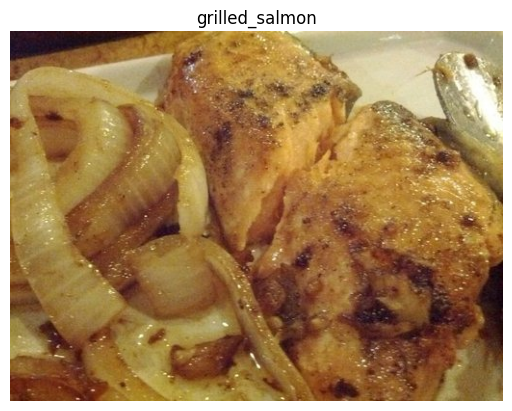

In [7]:
img = view_random_img(target_dir=train_dir,
                        target_class=random.choice(class_names))

## Preprocessing the data

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.) 
test_datagen = ImageDataGenerator(rescale = 1/255.) 

train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size = (224, 224),
                                              batch_size = 32,
                                              class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size = (224, 224),
                                            batch_size = 32, 
                                            class_mode = 'categorical')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [9]:
image, labels = train_data.next()
len(image), len(labels)

(32, 32)

In [10]:
image[:2]

array([[[[0.        , 0.03529412, 0.00392157],
         [0.        , 0.03529412, 0.00392157],
         [0.        , 0.02745098, 0.        ],
         ...,
         [0.06666667, 0.02745098, 0.01960784],
         [0.0627451 , 0.02352941, 0.01568628],
         [0.07450981, 0.03529412, 0.03137255]],

        [[0.        , 0.03529412, 0.00392157],
         [0.        , 0.03921569, 0.00784314],
         [0.00784314, 0.03529412, 0.00784314],
         ...,
         [0.04705883, 0.00784314, 0.        ],
         [0.0509804 , 0.01176471, 0.00392157],
         [0.0627451 , 0.02352941, 0.01568628]],

        [[0.00392157, 0.03137255, 0.00392157],
         [0.00392157, 0.03137255, 0.00392157],
         [0.01176471, 0.03921569, 0.01176471],
         ...,
         [0.0627451 , 0.02352941, 0.01568628],
         [0.06666667, 0.02745098, 0.01960784],
         [0.08235294, 0.04313726, 0.03529412]],

        ...,

        [[0.75294125, 0.8000001 , 0.75294125],
         [0.7568628 , 0.80392164, 0.7568628 ]

In [11]:
image.shape

(32, 224, 224, 3)

## Creating Basline Model 

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_1 = Sequential([
    
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")
])

model_1.compile(loss = 'categorical_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

history_1 = model_1.fit(train_data,
                       epochs = 5,
                       steps_per_epoch = len(train_data),
                       validation_data = test_data,
                       validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 39s 123ms/step - loss: 2.1088 - accuracy: 0.2296 - val_loss: 1.9700 - val_accuracy: 0.3052
Epoch 2/5
235/235 [==============================] - 28s 121ms/step - loss: 1.8534 - accuracy: 0.3549 - val_loss: 1.8302 - val_accuracy: 0.3648
Epoch 3/5
235/235 [==============================] - 26s 111ms/step - loss: 1.5393 - accuracy: 0.4807 - val_loss: 1.8887 - val_accuracy: 0.3612
Epoch 4/5
235/235 [==============================] - 27s 113ms/step - loss: 1.0588 - accuracy: 0.6528 - val_loss: 2.2516 - val_accuracy: 0.3164
Epoch 5/5
235/235 [==============================] - 26s 112ms/step - loss: 0.5278 - accuracy: 0.8317 - val_loss: 3.0532 - val_accuracy: 0.2876


In [13]:
model_1.evaluate(test_data)

79/79 [==============================] - 6s 78ms/step - loss: 3.0532 - accuracy: 0.2876


[3.0531771183013916, 0.28760001063346863]

In [14]:
def plot_loss_curves(history):
    """
     Returns separate loss curves for training and validation metrics.
    """ 
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();
     

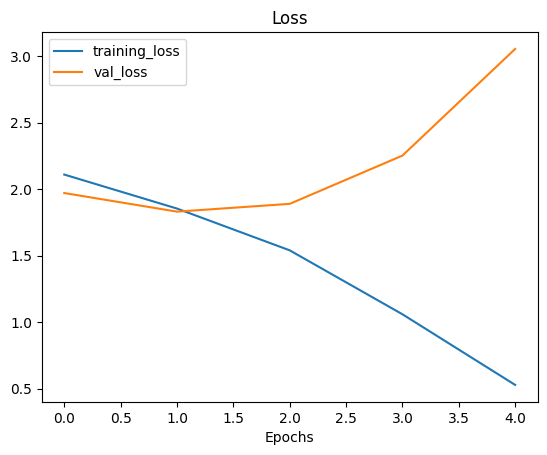

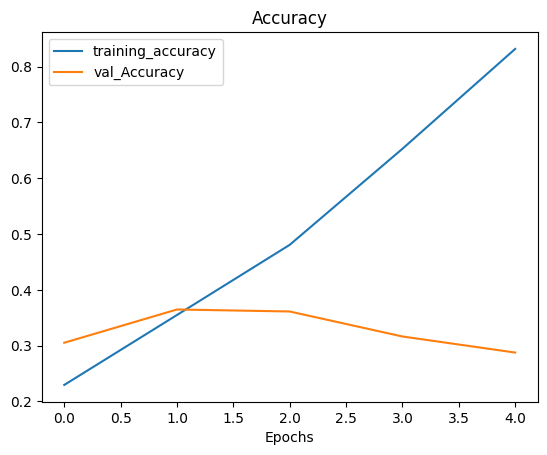

In [15]:
plot_loss_curves(history_1)

In [17]:
model_2 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_2.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 29s 116ms/step - loss: 2.1048 - accuracy: 0.2493 - val_loss: 2.0122 - val_accuracy: 0.3036
Epoch 2/5
235/235 [==============================] - 26s 109ms/step - loss: 1.7788 - accuracy: 0.3987 - val_loss: 1.8889 - val_accuracy: 0.3408
Epoch 3/5
235/235 [==============================] - 26s 111ms/step - loss: 1.3666 - accuracy: 0.5500 - val_loss: 2.0512 - val_accuracy: 0.3040
Epoch 4/5
235/235 [==============================] - 25s 104ms/step - loss: 0.7950 - accuracy: 0.7604 - val_loss: 2.3043 - val_accuracy: 0.3292
Epoch 5/5
235/235 [==============================] - 26s 110ms/step - loss: 0.3684 - accuracy: 0.9055 - val_loss: 2.8623 - val_accuracy: 0.2988


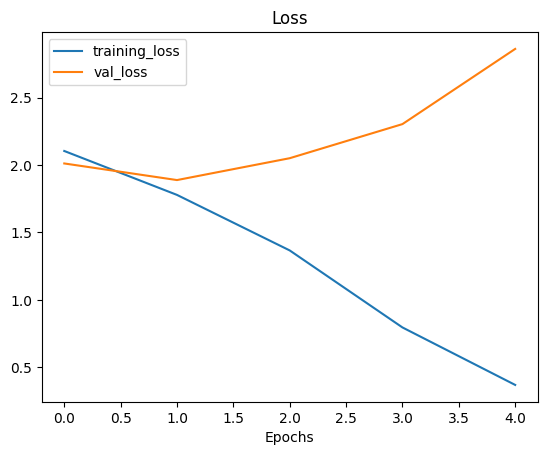

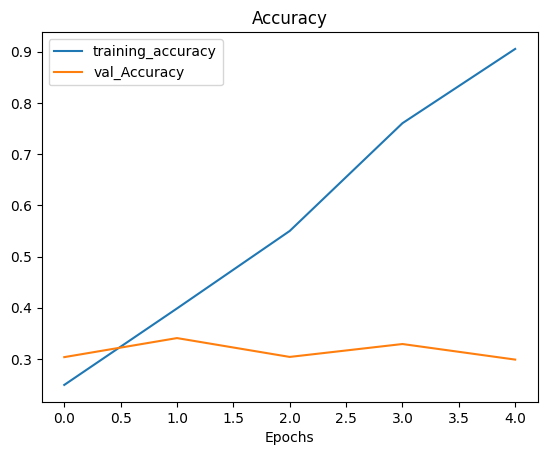

In [18]:
plot_loss_curves(history_2)

In [19]:
# creating data augmentation
train_data = ImageDataGenerator(rescale = 1/255., 
                                rotation_range = 20, 
                                width_shift_range = 0.2,
                                height_shift_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)

train_data = train_data.flow_from_directory(train_dir,
                                           target_size = (224, 224),
                                           batch_size = 32,
                                           class_mode = "categorical")

Found 7500 images belonging to 10 classes.


In [22]:
model_3 = tf.keras.models.clone_model(model_2)

model_3.compile(loss = 'categorical_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 99s 415ms/step - loss: 2.2585 - accuracy: 0.1631 - val_loss: 2.0961 - val_accuracy: 0.2196
Epoch 2/5
235/235 [==============================] - 95s 403ms/step - loss: 2.1432 - accuracy: 0.2131 - val_loss: 2.0650 - val_accuracy: 0.2308
Epoch 3/5
235/235 [==============================] - 96s 407ms/step - loss: 2.0967 - accuracy: 0.2488 - val_loss: 1.9389 - val_accuracy: 0.3208
Epoch 4/5
235/235 [==============================] - 95s 405ms/step - loss: 2.0463 - accuracy: 0.2820 - val_loss: 1.9128 - val_accuracy: 0.3256
Epoch 5/5
235/235 [==============================] - 97s 412ms/step - loss: 1.9876 - accuracy: 0.3037 - val_loss: 1.8372 - val_accuracy: 0.3692


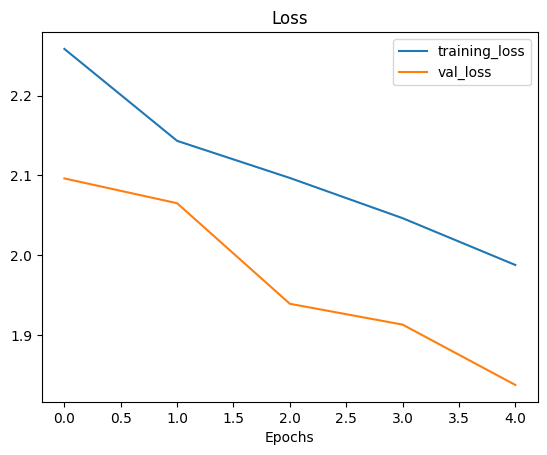

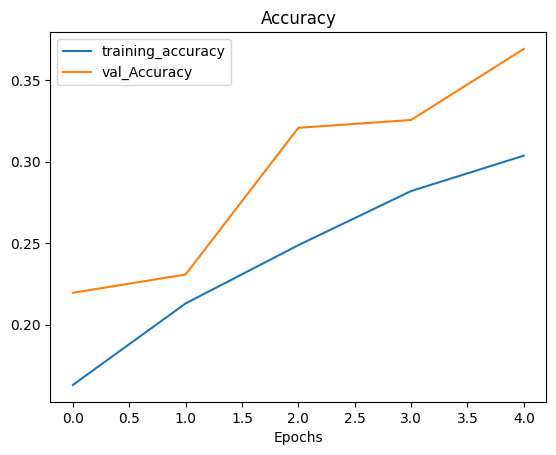

In [23]:
plot_loss_curves(history_3)

In [27]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [37]:
def load_and_prep_images(filename, img_shape=224):
  
    img = tf.io.read_file(filename)

    img = tf.image.decode_image(img, channels=3)

    img = tf.image.resize(img, size = [img_shape, img_shape])
    
    img = img/255.
  
    return img

In [38]:
def pred_and_plot(model, filename, class_names):
  
    # Import the target image and preprocess it
    img = load_and_prep_images(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    if len(pred[0]) > 1: # check for multi-class
        pred_class = class_names[pred.argmax()] # if more than one output, take the max
    else:
        pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

1/1 [==============================] - 0s 163ms/step


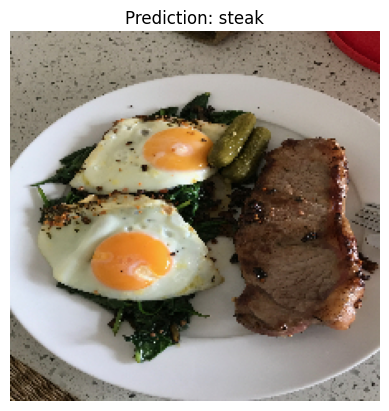

In [39]:
pred_and_plot(model_3, "03-steak.jpeg", class_names)

1/1 [==============================] - 0s 20ms/step


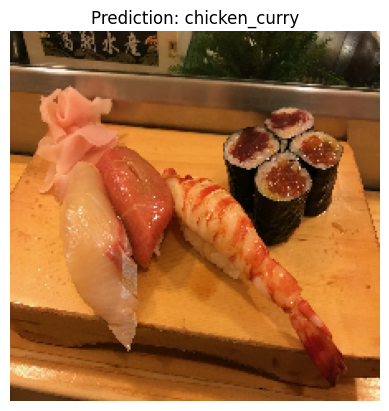

In [40]:
pred_and_plot(model_3, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 19ms/step


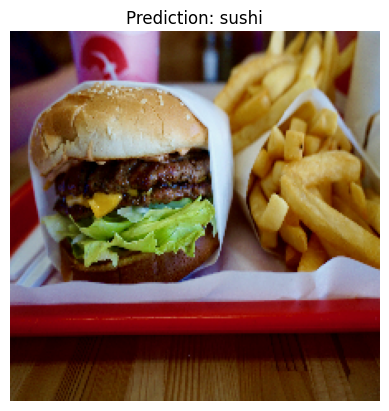

In [41]:
pred_and_plot(model_3, "03-hamburger.jpeg", class_names)

Notice wrong prediction. We still need to improve our model

In [42]:
model_3.save("saved_trained_model")

In [43]:
loaded_model_3 = tf.keras.models.load_model("saved_trained_model")
loaded_model_3.evaluate(test_data)

79/79 [==============================] - 7s 81ms/step - loss: 1.8372 - accuracy: 0.3692


[1.8372148275375366, 0.3691999912261963]